# Import Libraries

In [1]:
import pandas as pd
import xlrd
import matplotlib.pyplot as plt
import seaborn as sns
from graphviz import Digraph
import os 

## Read dataset and convert them to DataFrames

#### Customer Data - Customer.xls

In [2]:
customer_df = pd.read_excel(r'C:\Users\F0001144\Desktop\PEI\Customer.xls', sheet_name='atkoe-u250m') #Change file path for Customer.xls

print(customer_df.head())

   Customer_ID    First     Last  Age Country
0            1   Joseph     Rice   43     USA
1            2     Gary    Moore   71     USA
2            3     John   Walker   44      UK
3            4     Eric   Carter   38      UK
4            5  William  Jackson   58     UAE


### Orders Data - Order.csv

In [3]:
order_df = pd.read_csv(r'C:\Users\F0001144\Desktop\PEI\Order.csv') #Change file path for Order.csv

print(order_df.head())

   Order_ID      Item  Amount  Customer_ID
0         1  Keyboard     400          139
1         2     Mouse     300          250
2         3   Monitor   12000          239
3         4  Keyboard     400          153
4         5  Mousepad     250          153


### Shipping Data - Shipping.json

In [4]:
shipping_df = pd.read_json(r'C:\Users\F0001144\Desktop\PEI\Shipping.json') #Change file path for Shipping.csv

print(shipping_df.head())

   Shipping_ID     Status  Customer_ID
0            1    Pending          173
1            2    Pending          155
2            3  Delivered          242
3            4    Pending          223
4            5  Delivered           72


# Exploratory Data Analysis

### Checking Null Values, Removing Duplicates & Fetching decription and info for DataFrame - Customer Data

In [5]:
null_values = customer_df.isnull().sum()
print("Number of null values in each column:") # Display the number of null values within each column
print(null_values)

customer_df_cleaned = customer_df.drop_duplicates() # Remove duplicates based on all columns

duplicates_removed = len(customer_df) - len(customer_df_cleaned) # Calculate number of Duplicates removed
print(f"\nNumber of duplicate rows removed: {duplicates_removed}") # Display the number of duplicates removed

customer_df = customer_df_cleaned

print("\nCleaned Customer DataFrame:")
print(customer_df.head())

Number of null values in each column:
Customer_ID    0
First          0
Last           0
Age            0
Country        0
dtype: int64

Number of duplicate rows removed: 0

Cleaned Customer DataFrame:
   Customer_ID    First     Last  Age Country
0            1   Joseph     Rice   43     USA
1            2     Gary    Moore   71     USA
2            3     John   Walker   44      UK
3            4     Eric   Carter   38      UK
4            5  William  Jackson   58     UAE


In [6]:
customer_df.describe()

,Customer_ID,Age
count,250.000000,250.000000
mean,125.500000,47.576000
std,72.312977,18.978011
min,1.000000,18.000000
25%,63.250000,29.000000
50%,125.500000,47.000000
75%,187.750000,63.000000
max,250.000000,80.000000


In [7]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Customer_ID  250 non-null    int64 
 1   First        250 non-null    object
 2   Last         250 non-null    object
 3   Age          250 non-null    int64 
 4   Country      250 non-null    object
dtypes: int64(2), object(3)
memory usage: 9.9+ KB


### Checking Null Values, Removing Duplicates & Fetching decription and info for DataFrame - Order Data

In [8]:
null_values_order = order_df.isnull().sum()
print("Number of null values in each column of Order data:")
print(null_values_order)

order_df_cleaned = order_df.drop_duplicates()

duplicates_removed_order = len(order_df) - len(order_df_cleaned)
print(f"\nNumber of duplicate rows removed from Order data: {duplicates_removed_order}")

order_df = order_df_cleaned

print("\nCleaned Order DataFrame:")
print(order_df.head())

Number of null values in each column of Order data:
Order_ID       0
Item           0
Amount         0
Customer_ID    0
dtype: int64

Number of duplicate rows removed from Order data: 0

Cleaned Order DataFrame:
   Order_ID      Item  Amount  Customer_ID
0         1  Keyboard     400          139
1         2     Mouse     300          250
2         3   Monitor   12000          239
3         4  Keyboard     400          153
4         5  Mousepad     250          153


In [9]:
order_df.describe()

,Order_ID,Amount,Customer_ID
count,250.000000,250.00000,250.000000
mean,125.500000,2130.00000,130.404000
std,72.312977,3575.43493,69.192711
min,1.000000,200.00000,4.000000
25%,63.250000,300.00000,71.500000
50%,125.500000,400.00000,125.500000
75%,187.750000,1500.00000,190.750000
max,250.000000,12000.00000,250.000000


In [10]:
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Order_ID     250 non-null    int64 
 1   Item         250 non-null    object
 2   Amount       250 non-null    int64 
 3   Customer_ID  250 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.9+ KB


### Checking Null Values, Removing Duplicates & Fetching decription and info for DataFrame - Shipping Data

In [11]:
null_values_shipping = shipping_df.isnull().sum()
print("Number of null values in each column of Shipping data:")
print(null_values_shipping)

shipping_df_cleaned = shipping_df.drop_duplicates()

duplicates_removed_shipping = len(shipping_df) - len(shipping_df_cleaned)
print(f"\nNumber of duplicate rows removed from Shipping data: {duplicates_removed_shipping}")

shipping_df = shipping_df_cleaned

print("\nCleaned Shipping DataFrame:")
print(shipping_df.head())

Number of null values in each column of Shipping data:
Shipping_ID    0
Status         0
Customer_ID    0
dtype: int64

Number of duplicate rows removed from Shipping data: 0

Cleaned Shipping DataFrame:
   Shipping_ID     Status  Customer_ID
0            1    Pending          173
1            2    Pending          155
2            3  Delivered          242
3            4    Pending          223
4            5  Delivered           72


In [12]:
shipping_df.describe()

,Shipping_ID,Customer_ID
count,250.000000,250.000000
mean,125.500000,120.620000
std,72.312977,73.893848
min,1.000000,1.000000
25%,63.250000,53.250000
50%,125.500000,118.000000
75%,187.750000,187.500000
max,250.000000,248.000000


In [13]:
shipping_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Shipping_ID  250 non-null    int64 
 1   Status       250 non-null    object
 2   Customer_ID  250 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 6.0+ KB


# Distribution and Outliers Check

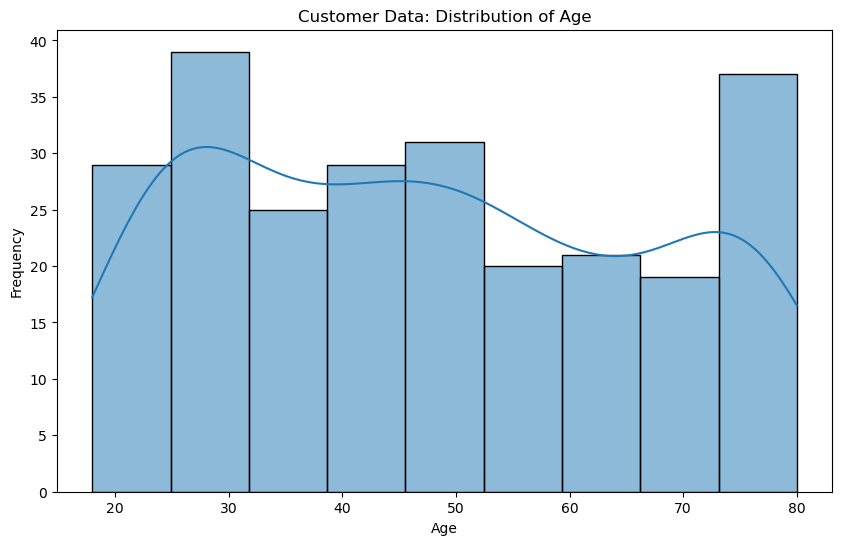

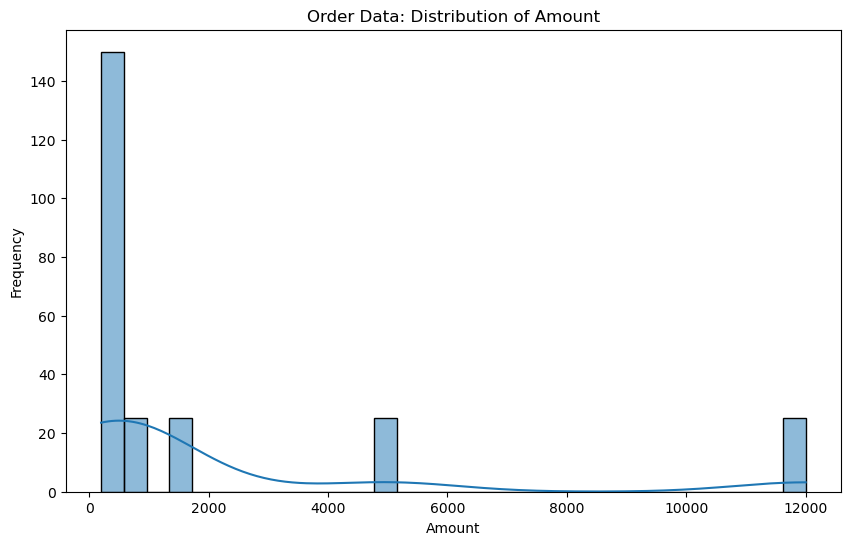

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_distribution(df, numeric_columns, title):
    for col in numeric_columns:
        plt.figure(figsize=(10, 6))
        sns.histplot(df[col], kde=True)
        plt.title(f'{title}: Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()

plot_distribution(customer_df, ['Age'], 'Customer Data') # Plot distribution for Customer data (Age)

plot_distribution(order_df, ['Amount'], 'Order Data') # Plot distribution for Order data (Amount)

##### Shipping data does not have numeric columns suitable for skewness analysis but could potentially plot categorical data distribution

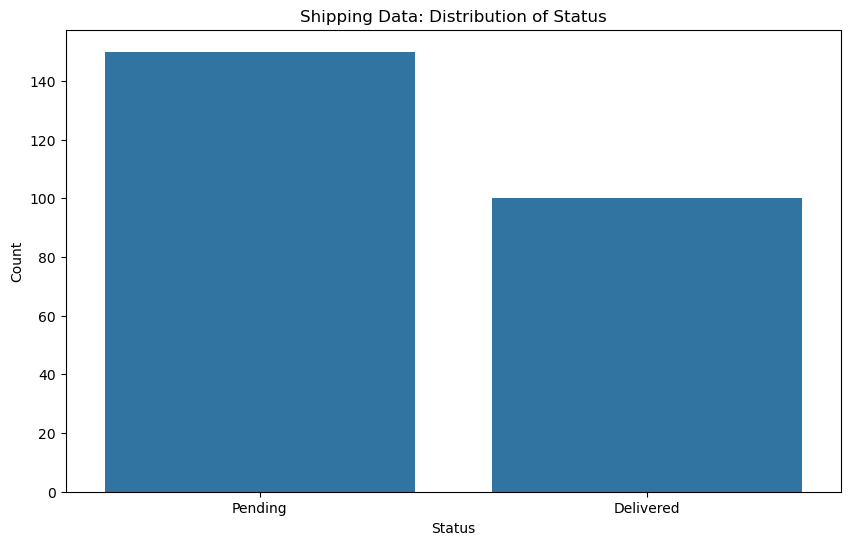

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Status', data=shipping_df)
plt.title('Shipping Data: Distribution of Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

### Checking Pair Plot Distribution for checking scatter disctribution to get understanding of data distribution, and simultaneously checking any co-relation among dataset

Pairplot for Customer DataFrame:


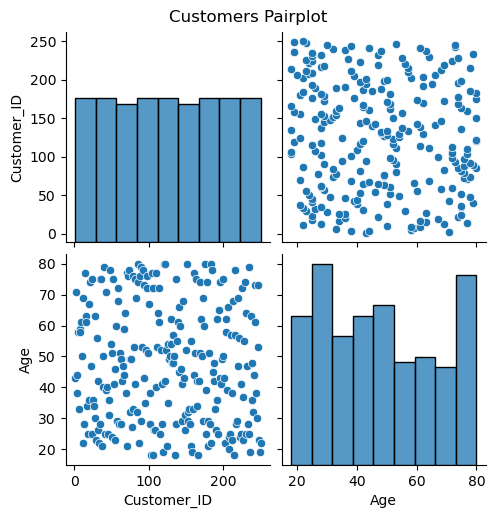

Pairplot for Order DataFrame:


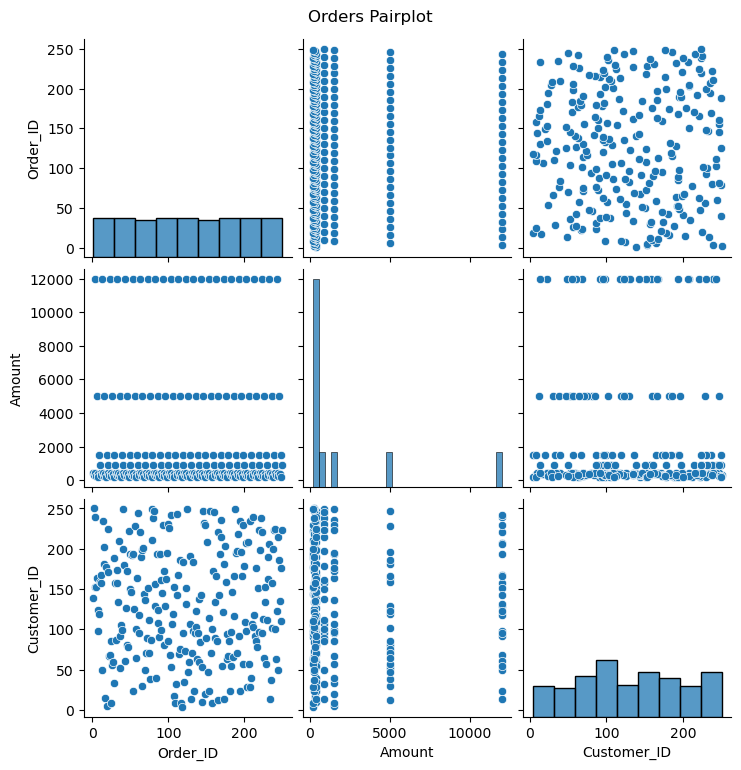

Pairplot for Shipping DataFrame:


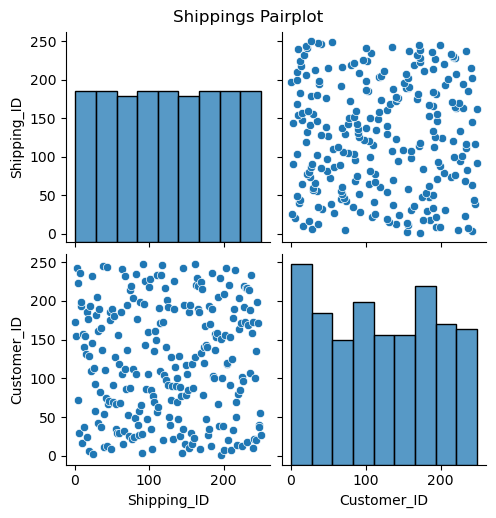

In [16]:
def plot_pairplot(df, title):
    sns.pairplot(df)
    plt.suptitle(title, y=1.02)
    plt.show()

print("Pairplot for Customer DataFrame:")
plot_pairplot(customer_df, "Customers Pairplot")

print("Pairplot for Order DataFrame:")
plot_pairplot(order_df, "Orders Pairplot")

print("Pairplot for Shipping DataFrame:")
plot_pairplot(shipping_df, "Shippings Pairplot")

### Checking Skewness of data and getting Box plot to get Outliers


Skewness for Age in Customer Data: 0.1775632745235068
Number of outliers in Age: 0


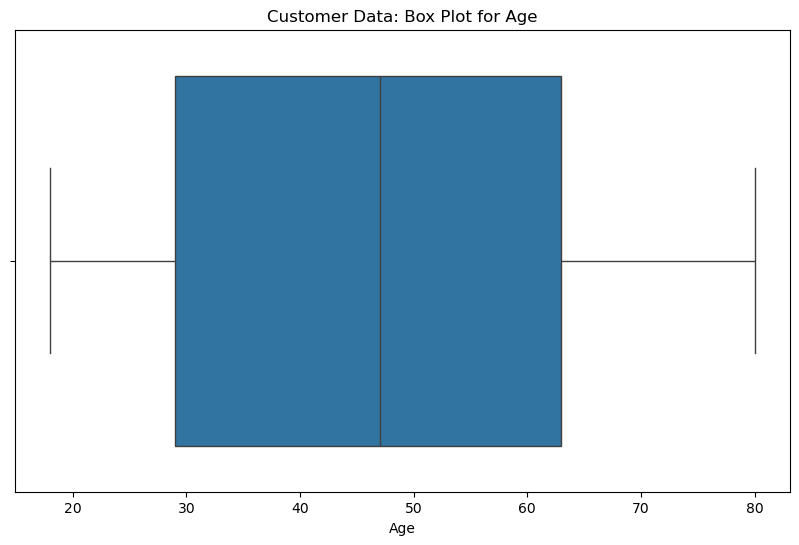


Skewness for Amount in Order Data: 2.0971397084331387
Number of outliers in Amount: 50


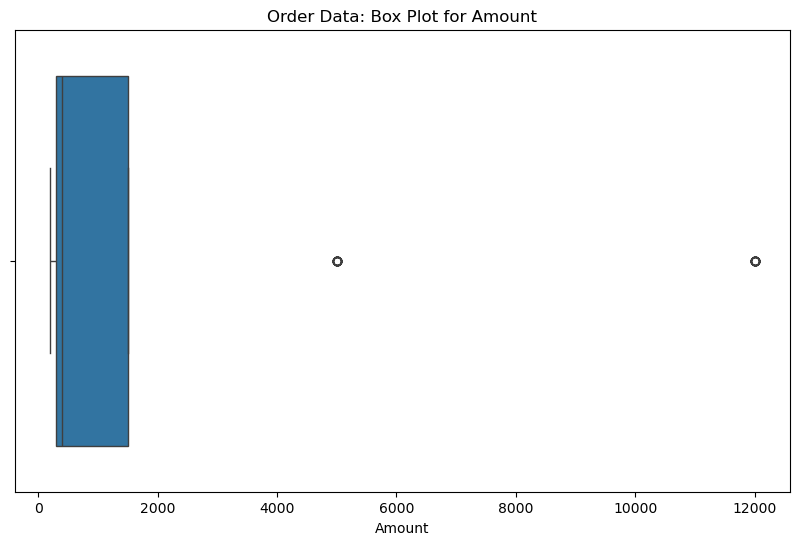

In [17]:
from scipy.stats import skew

def analyze_skewness_and_outliers(df, numeric_columns, title):
    for col in numeric_columns:
        skewness = df[col].skew() # Calculate skewness
        print(f"\nSkewness for {col} in {title}: {skewness}")

        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1         # Detect outliers using IQR method
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        print(f"Number of outliers in {col}: {len(outliers)}")
        
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=df[col])
        plt.title(f'{title}: Box Plot for {col}')
        plt.show()

analyze_skewness_and_outliers(customer_df, ['Age'], 'Customer Data')

analyze_skewness_and_outliers(order_df, ['Amount'], 'Order Data')

### Outliers Analysis

### List of Outlier data in Orders Table - Amount Column

Outliers in the Order Amount:
     Order_ID      Item  Amount  Customer_ID
2           3   Monitor   12000          239
5           6  Harddisk    5000          164
12         13   Monitor   12000           49
15         16  Harddisk    5000          181
22         23   Monitor   12000           68
25         26  Harddisk    5000           56
32         33   Monitor   12000          158
35         36  Harddisk    5000           52
42         43   Monitor   12000           61
45         46  Harddisk    5000           81
52         53   Monitor   12000          193
55         56  Harddisk    5000          228
62         63   Monitor   12000          221
65         66  Harddisk    5000           30
72         73   Monitor   12000          151
75         76  Harddisk    5000           38
82         83   Monitor   12000          129
85         86  Harddisk    5000          124
92         93   Monitor   12000          229
95         96  Harddisk    5000          129
102       103   Monitor  

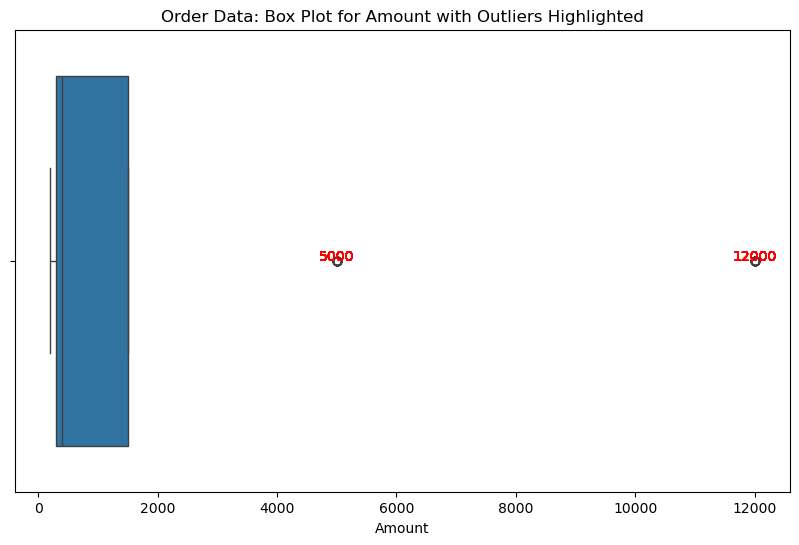

In [18]:
Q1 = order_df['Amount'].quantile(0.25)
Q3 = order_df['Amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = order_df[(order_df['Amount'] < lower_bound) | (order_df['Amount'] > upper_bound)]

print("Outliers in the Order Amount:")
print(outliers)

overall_mean = order_df['Amount'].mean()
outliers_mean = outliers['Amount'].mean()

print(f"\nOverall mean of Amount: {overall_mean}")
print(f"Mean of Amount for outliers: {outliers_mean}")

plt.figure(figsize=(10, 6)) 
sns.boxplot(x=order_df['Amount']) # Checking outliers with a box plot
plt.title('Order Data: Box Plot for Amount with Outliers Highlighted')

for i in range(len(outliers)): # Adding value annotations for outliers
    plt.text(x=outliers.iloc[i]['Amount'], y=0, s=f"{outliers.iloc[i]['Amount']}", 
             horizontalalignment='center', color='red')

plt.show()

# Data Modelling - Star & Snowflake Schema

### Snowflake Schema Function

In [19]:
def create_snowflake_schema():
    dot = Digraph('Snowflake Schema', node_attr={'shape': 'box'})

    dot.node('Order Fact Table', 'Order Fact Table\n(Order_ID, Customer_ID, Product_ID, Amount)')

    dot.node('Customer Table', 'Customer Table\n(Customer_ID, First, Last, Age, Country_ID)')
    dot.node('Country Table', 'Country Table\n(Country_ID, Country)')
    dot.node('Product Table', 'Product Table\n(Product_ID, Item)')
    dot.node('Shipping Table', 'Shipping Table\n(Shipping_ID, Customer_ID, Status)')

    dot.edge('Customer Table', 'Order Fact Table', label='1-to-Many')
    dot.edge('Country Table', 'Customer Table', label='1-to-Many')
    dot.edge('Product Table', 'Order Fact Table', label='1-to-Many')
    dot.edge('Customer Table', 'Shipping Table', label='1-to-Many')

    return dot

#### Generate Snowflake Schema

In [20]:
snowflake_schema = create_snowflake_schema()
snowflake_schema.render(filename='snowflake_schema', format='png', cleanup=True)
snowflake_schema.view()

'snowflake_schema.pdf'

## As Shipping table is connected with Customer Table, and Fact table is Orders, thus creating only Snowflake Schema. Star Schema can't be used due to missing key in Shipping table with Orders Table

# Generate file as per Data Models and Export it to CSV for further use - Cleaned, Transformed Data Tables as Per Snowflake Data Model

### Function to remove file if file exist, else create a new one 

In [21]:
def remove_file_if_exists(file_path):
    if os.path.exists(file_path):
        os.remove(file_path)
        print(f"File {file_path} removed.")
    else:
        print(f"File {file_path} does not exist, creating a new one.")

### Country Table

In [22]:
country_df = customer_df[['Country']].drop_duplicates().reset_index(drop=True)
country_df['Country_ID'] = country_df.index + 1

country_file = r'C:\Users\F0001144\Desktop\PEI\DataModelTables\Country_Table.csv'

remove_file_if_exists(country_file)

country_df.to_csv(country_file, index=False)

print("Country Table Created Successfully.!")

File C:\Users\F0001144\Desktop\PEI\DataModelTables\Country_Table.csv does not exist, creating a new one.
Country Table Created Successfully.!


### Customer Table

In [23]:
if 'Country_ID' in customer_df.columns:
    customer_df = customer_df.drop(columns=['Country_ID'])

customer_df = pd.merge(customer_df, country_df, on='Country')
customer_table = customer_df[['Customer_ID', 'First', 'Last', 'Age', 'Country_ID']]

customer_file = r'C:\Users\F0001144\Desktop\PEI\DataModelTables\Customer_Table.csv'
remove_file_if_exists(customer_file)
customer_table.to_csv(customer_file, index=False)

print("Customer Table Created Successfully.!")

File C:\Users\F0001144\Desktop\PEI\DataModelTables\Customer_Table.csv does not exist, creating a new one.
Customer Table Created Successfully.!


### Product Table

In [24]:
product_df = order_df[['Item']].drop_duplicates().reset_index(drop=True)
product_df['Product_ID'] = product_df.index + 1

product_file = r'C:\Users\F0001144\Desktop\PEI\DataModelTables\Product_Table.csv'
remove_file_if_exists(product_file)
product_df.to_csv(product_file, index=False)

print("Product Table Created Successfully.!")

File C:\Users\F0001144\Desktop\PEI\DataModelTables\Product_Table.csv does not exist, creating a new one.
Product Table Created Successfully.!


### Orders Table

In [25]:
if 'Product_ID' in order_df.columns:
    order_df = order_df.drop(columns=['Product_ID'])

order_df = pd.merge(order_df, product_df, on='Item')
order_fact_table = order_df[['Order_ID', 'Customer_ID', 'Product_ID', 'Amount']]

order_fact_file = r'C:\Users\F0001144\Desktop\PEI\DataModelTables\Order_Fact_Table.csv'
remove_file_if_exists(order_fact_file)
order_fact_table.to_csv(order_fact_file, index=False)

print("Orders Table Created Successfully.! (This is Fact (Base) Table in Snowflake Schema)")

File C:\Users\F0001144\Desktop\PEI\DataModelTables\Order_Fact_Table.csv does not exist, creating a new one.
Orders Table Created Successfully.! (This is Fact (Base) Table in Snowflake Schema)


### Shipping Table

In [26]:
shipping_file = r'C:\Users\F0001144\Desktop\PEI\DataModelTables\Shipping_Table.csv'
remove_file_if_exists(shipping_file)
shipping_df.to_csv(shipping_file, index=False)

print("Shipping Table Created Successfully.!")

File C:\Users\F0001144\Desktop\PEI\DataModelTables\Shipping_Table.csv does not exist, creating a new one.
Shipping Table Created Successfully.!


In [27]:
print("All tables have been saved as CSV files.")

All tables have been saved as CSV files.


## Final Table after Data Modelling in Snowflake schema is ready.

### Tables : {Country Table, Customer Table, Product Table, Orders Table, Shipping Table}

#### We can start creating visualisations now. Kindly refer to dashboard file for Visualisations using final cleaned table